In [ ]:
%matplotlib inline
%run helper_functions.py
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn
sns.set_style("whitegrid")

# LOAD IRIS DATASET

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

In [3]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


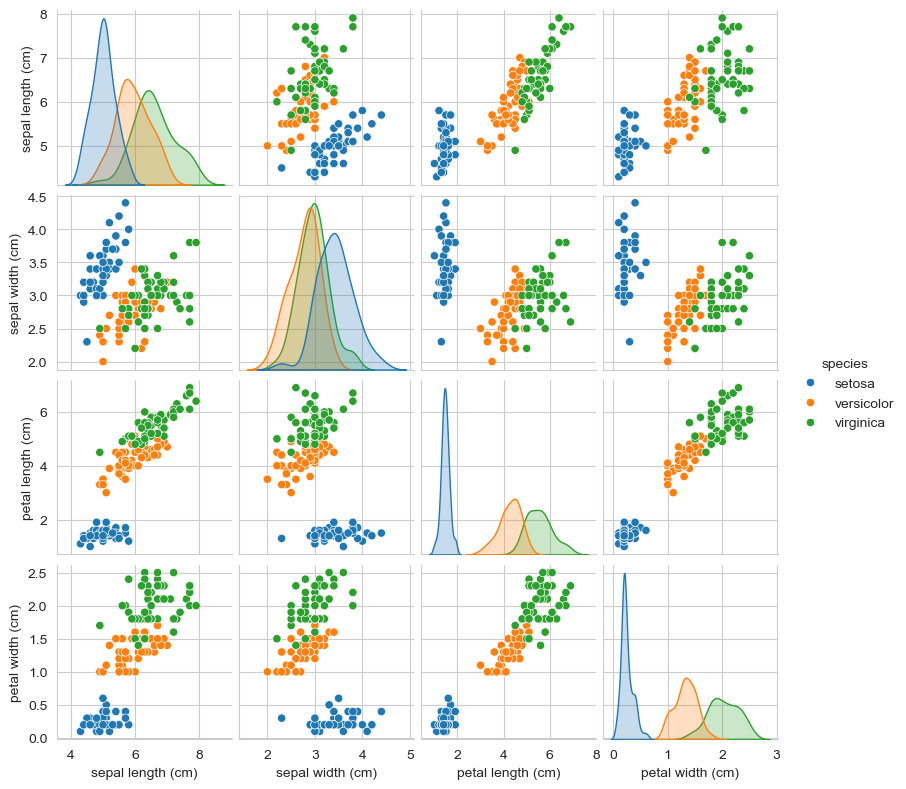

In [ ]:
sns.pairplot(iris_df, hue="species", height=2, diag_kind="kde")
plt.show()

In [7]:
X = iris.data
feature_names = iris.feature_names
y = iris.target
class_labels = iris.target_names

In [8]:
#normalise data to 0 mean 1 std
from sklearn.preprocessing import StandardScaler
X  = StandardScaler().fit_transform(X)

# Fitting a model
Feel free to play with the kernel and the "gamma" parameter to see the accuracy and the results on the boundaries

Accuracy Training        : 0.54
Accuracy cross validation: 0.32 (+/- 0.00)


C:\Users\Admin\Desktop\01_Projects\Data Science Toolbox\Part_1\CodeAlreadyFilled\helper_functions.py:48: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
C:\Users\Admin\Desktop\01_Projects\Data Science Toolbox\Part_1\CodeAlreadyFilled\helper_functions.py:48: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
C:\Users\Admin\Desktop\01_Projects\Data Science Toolbox\Part_1\CodeAlreadyFilled\helper_functions.py:48: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
C:\Users\Admin\Desktop\01_Projects\Data Science Toolbox\Part_1\CodeAlreadyFilled\helper_functions.py:48: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
 

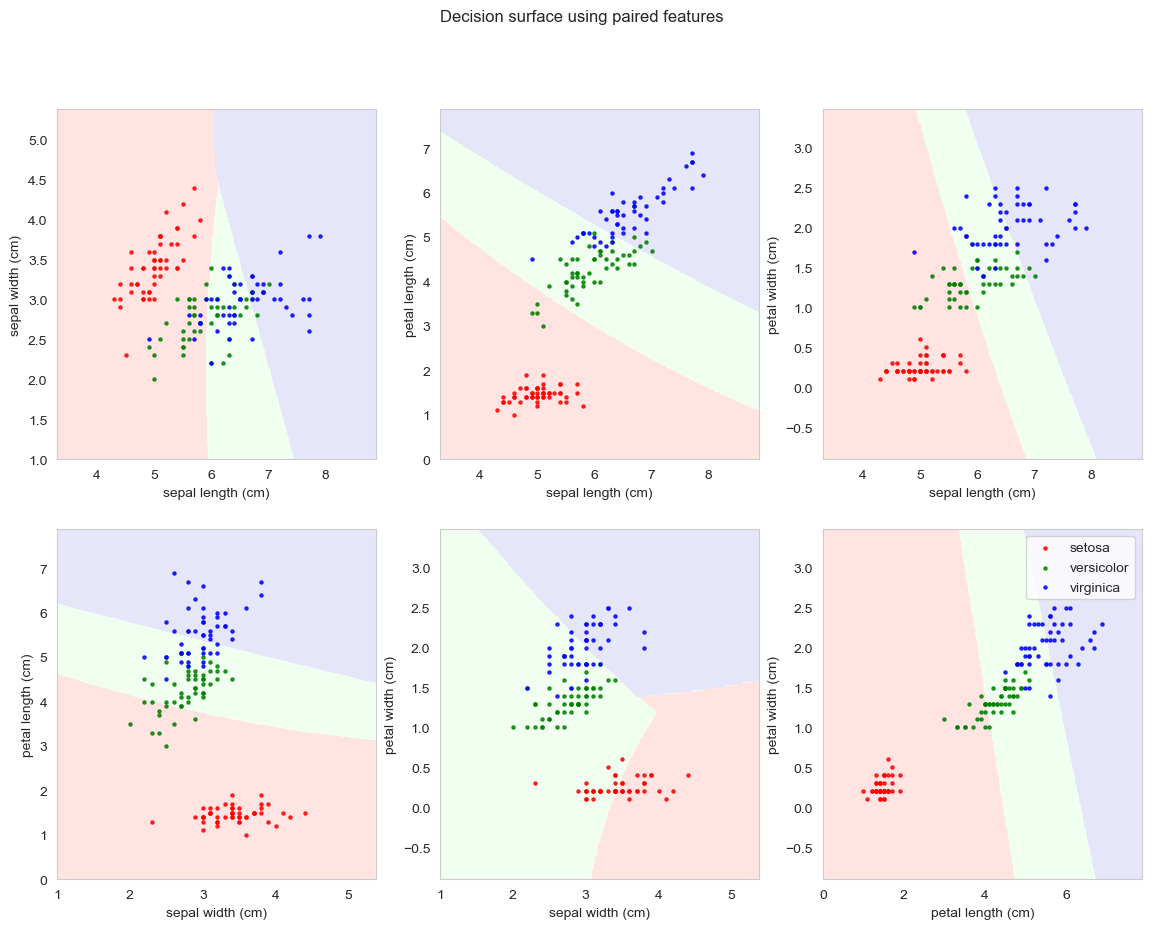

In [9]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

#Kernel choice: ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’. Default rbf
svm = SVC(C=1, gamma=0.01, kernel='poly', random_state=0) #play with these values
svm.fit(X,y)

# score at training
score_test = svm.score(X, y)
print("Accuracy Training        :", score_test)

# score when cross_validating
scores = cross_val_score(svm, X, y, cv=3)
print("Accuracy cross validation: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

plot_boundaries_iris_dataset(svm, iris)

# Main Parameters to tune

Here we do a grid search on Gamma and C

Best parameters:  SVC(C=1, gamma=0.1291549665014884)
Best score:  0.9800000000000001


C:\Users\Admin\Desktop\01_Projects\Data Science Toolbox\Part_1\CodeAlreadyFilled\helper_functions.py:48: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
C:\Users\Admin\Desktop\01_Projects\Data Science Toolbox\Part_1\CodeAlreadyFilled\helper_functions.py:48: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
C:\Users\Admin\Desktop\01_Projects\Data Science Toolbox\Part_1\CodeAlreadyFilled\helper_functions.py:48: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
C:\Users\Admin\Desktop\01_Projects\Data Science Toolbox\Part_1\CodeAlreadyFilled\helper_functions.py:48: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
 

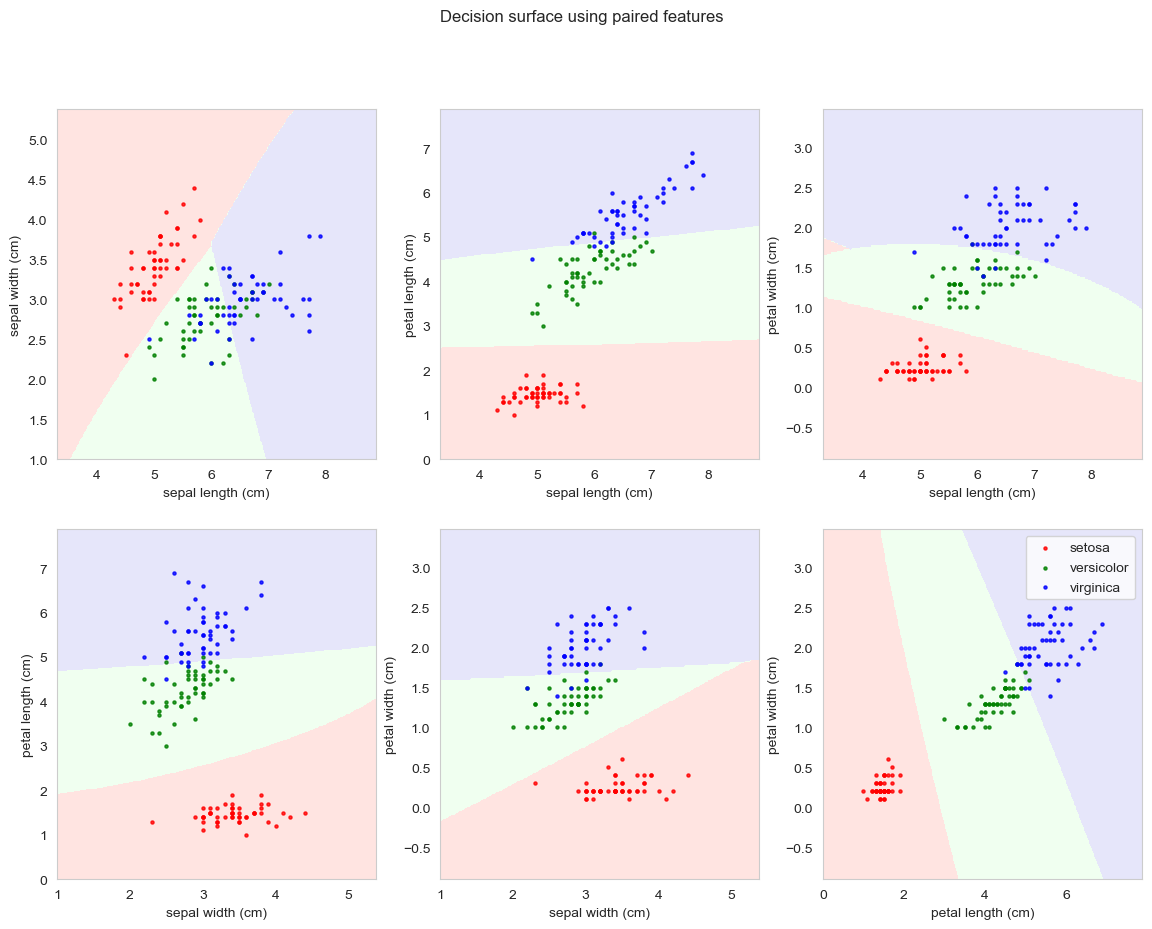

In [10]:
from sklearn.model_selection import GridSearchCV

params = { 
           'gamma':  np.logspace(-2, 0, 10),
           'C'   :   [0.1, 1, 10]
         }

svm = SVC()

grid = GridSearchCV(estimator=svm, cv = 10, param_grid=params )
grid.fit(X, y)
# summarize the results of the grid search
print("Best parameters: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

plot_boundaries_iris_dataset(grid.best_estimator_, iris)

# Regression
SVMs also support regression

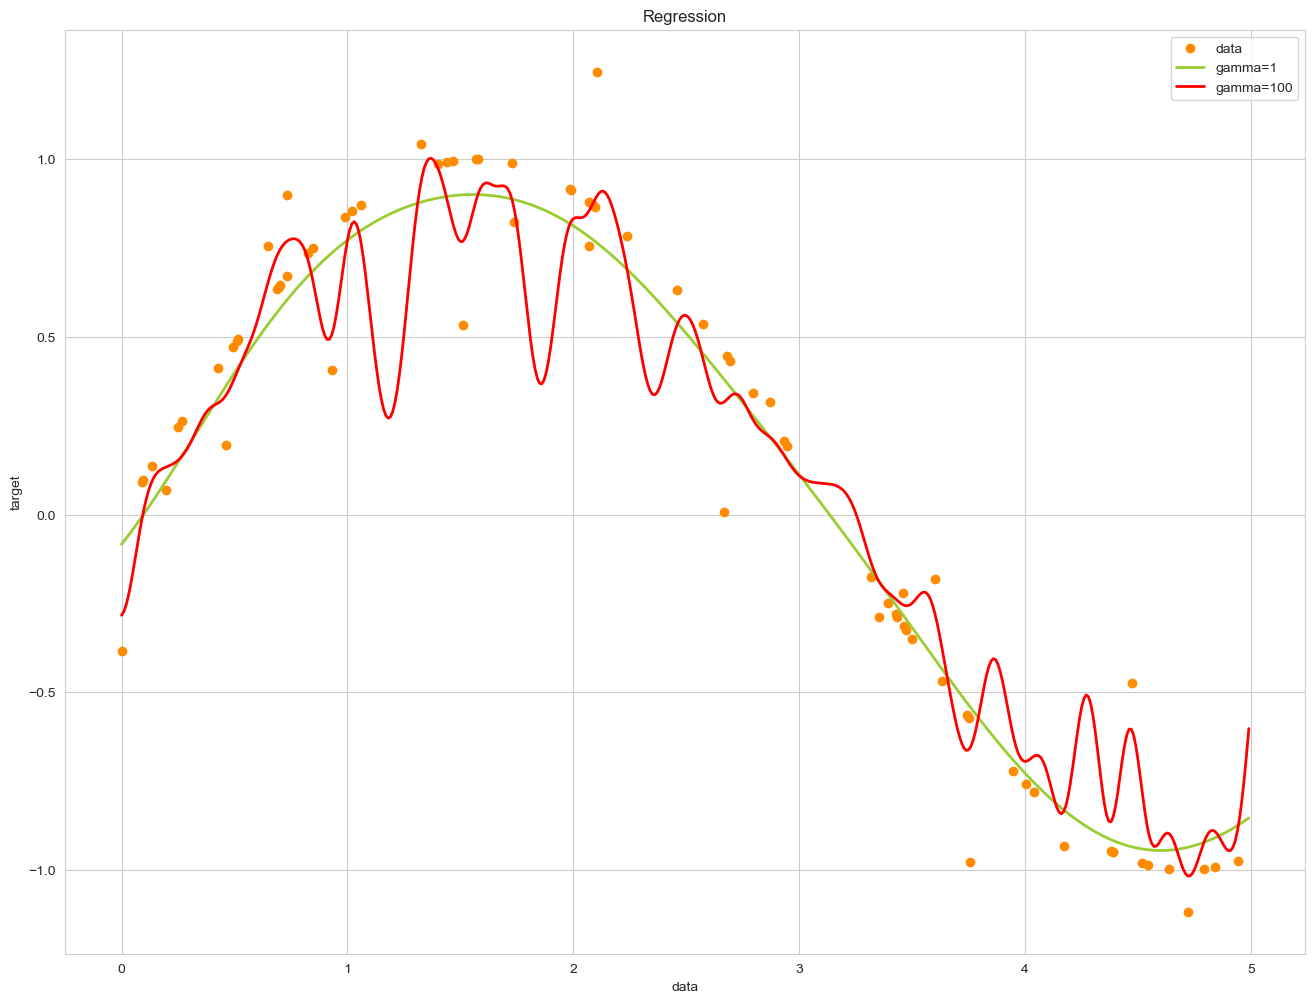

In [12]:
# generates random numbers and adds an error terms

from sklearn.svm import SVR
plt.rcParams['figure.figsize'] = (16, 12)


# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::4] += 1 * (0.5 - rng.rand(20))

# Fit regression model
regr_1 = SVR(gamma=1)
regr_1.fit(X, y)

regr_2 = SVR(gamma=100)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, c="darkorange", label="data")
plt.plot(X_test, y_1, color="yellowgreen", label="gamma=1", linewidth=2)
plt.plot(X_test, y_2, color="red", label="gamma=100", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Regression")
plt.legend()
plt.show()

